In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
soc = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
soc.shape

(400, 5)

In [4]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
soc.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [33]:
X = soc.iloc[:,[1,2,3]].values
print(X)

[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]


In [34]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
soc['Gender'] = le.fit_transform(soc['Gender'])

In [51]:
wcss = []

for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

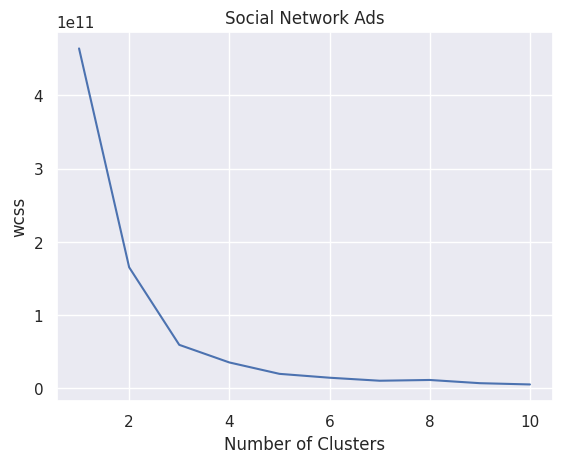

In [64]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Social Network Ads')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [54]:

kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans_final.fit(X)

Y = kmeans_final.labels_

In [55]:

soc['Cluster'] = Y

cluster_analysis = soc.groupby('Cluster').agg({
    'Age': 'mean',
    'EstimatedSalary': 'mean',
    'Gender': lambda x: x.value_counts().index[0]
}).reset_index()

print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
   Cluster        Age  EstimatedSalary  Gender
0        0  42.783784    125310.810811       0
1        1  35.589189     74156.756757       1
2        2  37.673759     34787.234043       0


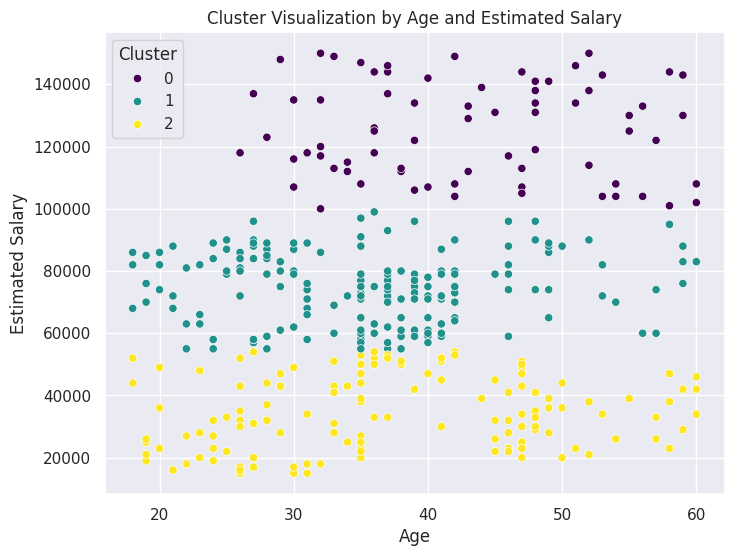

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Cluster', data=soc, palette='viridis')
plt.title('Cluster Visualization by Age and Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

<ipython-input-61-1900210446>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Age', data=cluster_analysis, palette='viridis')


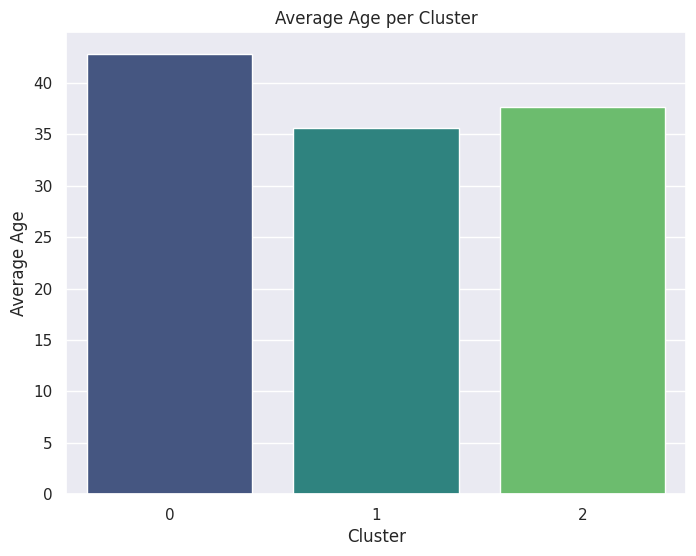

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Age', data=cluster_analysis, palette='viridis')
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()


<ipython-input-63-3428286270>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', data=soc, palette='viridis')


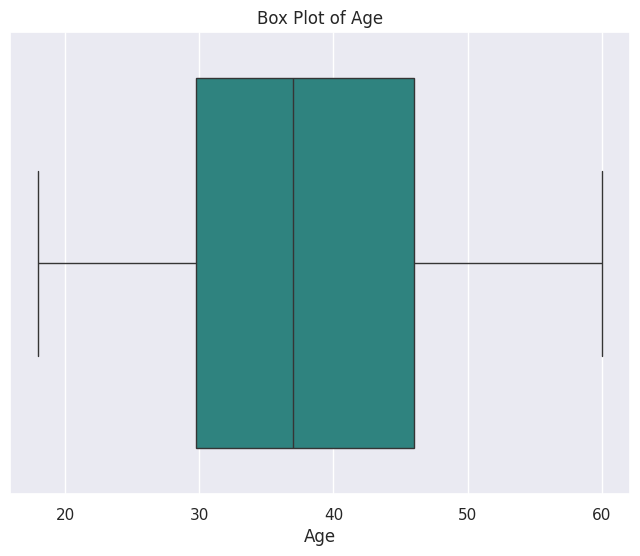

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=soc, palette='viridis')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()
